# Visualisation graphique : les courbes

## Présentation du jeu de données

__À vous !__
>- Importer les données 'unrate.csv' dans un dataframe.
>- Regarder ce qu'il contient et notamment les types des différentes variables présentes :
>>- Que dire du format des données de dates ?
>>- Utiliser pandas.to_datetime() pour les convertir au format datetime64

>La variable "unrate" correspond à _unemployment rate_ c'est-à-dire le taux de chômage.

In [32]:
import pandas as pd
df0 = pd.read_csv('Data/unrate.csv')
df0.tail(15)

,DATE,UNRATE
826,2016-11-01,4.6
827,2016-12-01,4.7
828,2017-01-01,4.8
829,2017-02-01,4.7
830,2017-03-01,4.5
831,2017-04-01,4.4
832,2017-05-01,4.3
833,2017-06-01,4.3
834,2017-07-01,4.3
835,2017-08-01,4.4


In [33]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    841 non-null    object 
 1   UNRATE  841 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.3+ KB


In [34]:
df0["DATE"] = pd.to_datetime(df0["DATE"])
df0["DATE"].head(13)

0    1948-01-01
1    1948-02-01
2    1948-03-01
3    1948-04-01
4    1948-05-01
5    1948-06-01
6    1948-07-01
7    1948-08-01
8    1948-09-01
9    1948-10-01
10   1948-11-01
11   1948-12-01
12   1949-01-01
Name: DATE, dtype: datetime64[ns]

In [16]:
df = pd.read_csv('Data/unrate.csv', parse_dates=True, index_col="DATE")
df

,UNRATE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5
...,...
2017-09-01,4.2
2017-10-01,4.1
2017-11-01,4.1


In [22]:
df.index

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2017-04-01', '2017-05-01', '2017-06-01', '2017-07-01',
               '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01',
               '2017-12-01', '2018-01-01'],
              dtype='datetime64[ns]', name='DATE', length=841, freq=None)

In [25]:
df.index.month

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
        4,  5,  6,  7,  8,  9, 10, 11, 12,  1],
      dtype='int32', name='DATE', length=841)

In [24]:
df.loc["2015"]

,UNRATE
DATE,
2015-01-01,5.7
2015-02-01,5.5
2015-03-01,5.5
2015-04-01,5.4
2015-05-01,5.5
2015-06-01,5.3
2015-07-01,5.2
2015-08-01,5.1
2015-09-01,5.0


## Introduction à matplotlib

In [27]:
# import de la bibliothèque pyplot de matplotlib
import matplotlib.pyplot as plt

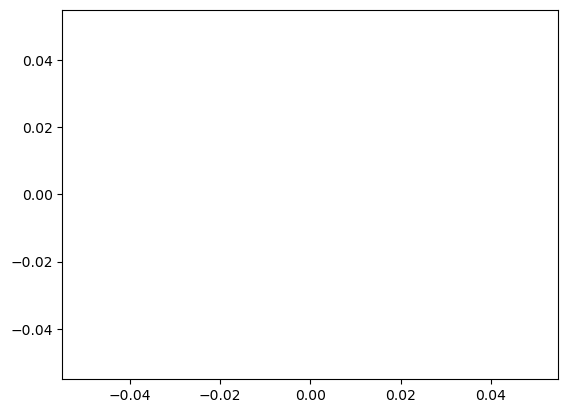

In [28]:
plt.plot() # génère un graphique avec les axes et les mesures sur les axes
plt.show() # affiche le graphique à l'écran (en l'occurence vide)

## Ajouter des données à nos graphiques

__À vous !__
>- Générer un graphique linéaire permettant de visualiser les taux de chômage de 1948 (_ie_ les 12 premières valeurs du dataframe)
>- Afficher le graphique

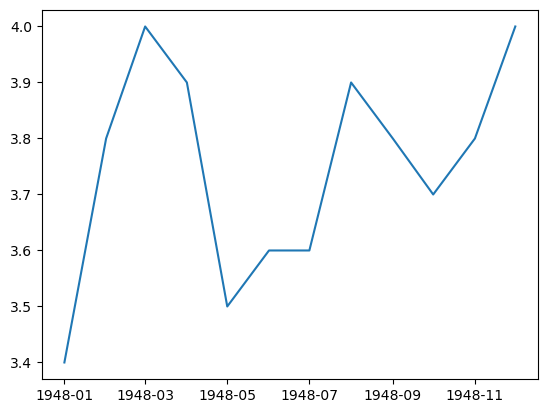

In [39]:
plt.plot(df0.loc[:11, 'DATE'], df0.loc[:11, 'UNRATE'])
plt.show()

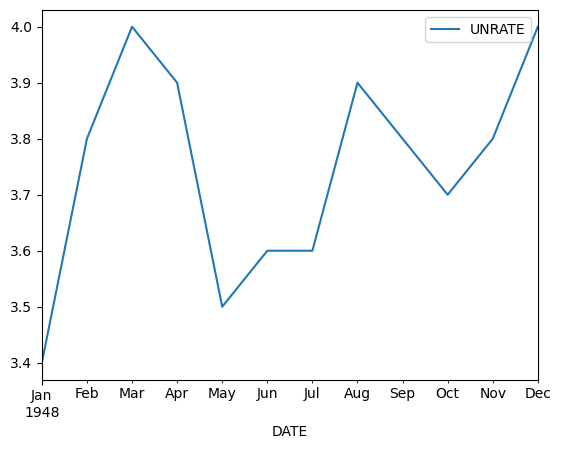

In [38]:
df.loc["1948"].plot();

## Créer une rotation sur les labels de l'axe des abscisses

On peut avoir un problème d'affichage au niveau des axes des abscisses avec des labels qui se chevauchent...un solution possible est de faire pivoter les labels de l'axe des x.  
Pour cela, utiliser la fonction pyplot.xticks() pour créer une roration de 90 degrés.

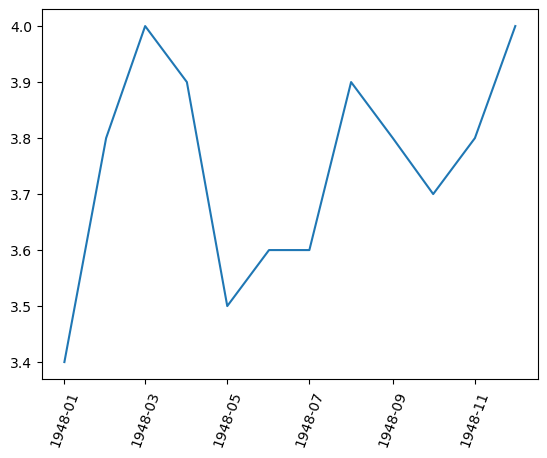

In [43]:
first_year = df0.loc[:11]
plt.plot('DATE', 'UNRATE', data=first_year)
plt.xticks(rotation=70) # essayer avec différentes valeurs d'angles pour obtenir l'affichage qui vous convient
plt.show()

## Personnaliser les courbes

De nombreuses options d'affichage sont disponibles pour personnaliser vos courbes (et notamment vous permettre de les différencier lorsqu'on affichera plusieurs courbes sur un même graphique).  
Jouer sur les différents paramètres suivants pour voir leurs effets (cf https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D.html)

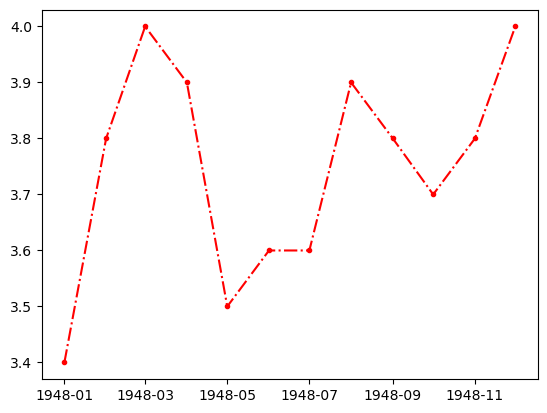

In [44]:
import matplotlib.pyplot as plt
plt.plot(first_year['DATE'], first_year['UNRATE'],
         color = 'red', ls="-.", lw = 1.5,
        marker=".")
plt.show()

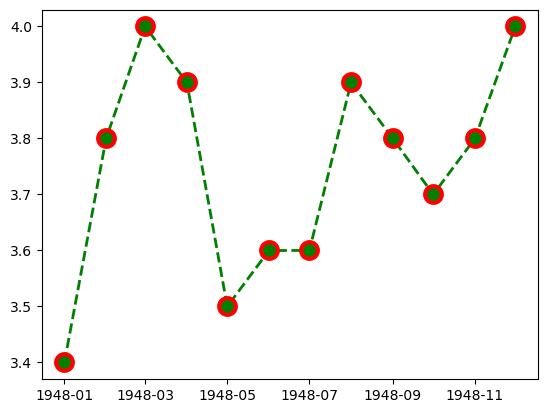

In [45]:
plt.plot(first_year['DATE'], first_year['UNRATE'],
         color = 'green',
         ls = '--', lw = 2,
         marker = 'o', ms = 12, mec = 'red', mew = 3, mfc = 'green')
plt.show()

## Ajouter les intitulés des axes et un titre à notre graphique

__À vous !__
>- Générer le même graphique que précédemment en ajoutant les intitulés des axes x et y ainsi que le titre (fonctions xlabel, ylabel et title).
>- Définir le nom de l'axe x par "Mois".
>- Définir le nom de l'axe y par "Taux de chômage (%)".
>- Définir le titre par "Évolution du taux de chômage en 1948 aux USA".
>- Afficher le graphique.  
>- Changer les limites de l'axe y, en le faisant notamment commencer par 0. Pourquoi c'est moins trompeur ainsi?

## Les classes matplotlib

Pour un graphique seul, pas de problème car pyplot stocke et met à jour ce graphique puis on peut faire des modifications sur ce graphique.
Pour tracer plusieurs graphiques, il faut être explicite et préciser lequel modifier. Il faut donc bien comprendre les classes matplotlib que pyplot utilise.

In [12]:
# Un conteneur pour tous les graphiques créés : objet figure. 

# Un conteneur pour que le graphique soit positionné sur une grille

# Les symboles visuels ajoutés sur le graphique

## Position des graphiques

Pour créer 6 graphiques sur 2 lignes et 3 colonnes.

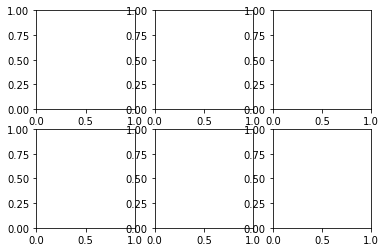

In [13]:
# Création d'un objet figure via pyplot.figure()
graphes = plt.figure()

# Pour ajouter des graphiques : figure.add_subplot(nrows,ncols,plot_number)
# Cela retourne un objet Axes que l'on stocke
# Objet Axes = conteneur avec ses propres composantes :
### les valeurs, marqueurs des axes X et Y, les symboles visuels, lignes, quadrillage etc...
ax1 = graphes.add_subplot(2,3,1)
ax2 = graphes.add_subplot(2,3,2)
ax3 = graphes.add_subplot(2,3,3)
ax4 = graphes.add_subplot(2,3,4)
ax5 = graphes.add_subplot(2,3,5)
ax6 = graphes.add_subplot(2,3,6)

### ATTENTION: le numéro de graphique se lit "en ligne de gauche à droite" donc ici :
# le graphique 3 est celui en 1ère ligne 3ème colonne
# le graphique 5 est celui en 2ère ligne 2ème colonne
# etc...

# Essayer de supprimer certains graphiques vous verrez ce qui se passe

# Affichage
plt.show()

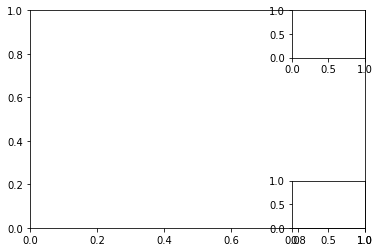

In [14]:
graphes = plt.figure()
ax1 = graphes.add_subplot(1,1,1)
ax2 = graphes.add_subplot(4,4,4)
ax3 = graphes.add_subplot(4,4,16)
plt.show()

## Ajouter des données aux graphiques

In [15]:
# Pour ensuite ajouter des données sur nos graphiques, on doit préciser sur quels axes on souhaite ajouter nos données
# On utilise donc une méthode des objets Axes, à savoir Axes.plot(x_values,y_values)

__À vous !__
>Créer 2 courbes linéaires dans une grille 2 lignes 1 colonne:
>- Dans le sous-graphique du haut, tracer les données de 1948
>- Dans le sous-graphique du bas, tracer les données de 1949
>- Afficher les 2 graphiques

## Améliorer l'affichage

__À vous !__
>- Pour le précédent graphique, ajouter une largeur de 15 et une hauteur de 8 (option figsize). Et ajouter un titre pour les 2 graphiques:
>>- "Taux de chômage en 1948"
>>- "Taux de chômage en 1949"
>- Ajouter aussi un titre global à la figure en haut :
>>- "Évolutions annuelles des taux de chômage en 1948 et 1949"
>- Jouer sur les différents paramètres de marges avec .subplots_adjust() pour espacer les graphiques comme vous les souhaitez
>>- left et bottom : valeurs entre 0 et 1 qui indiquent où commencent les graphes par rapport à la figure.
>>- right et top : valeurs entre 0 et 1 supérieures à left et bottom respectivement qui indiquent où finissent les graphes par rapport à la figure.
>>- wspace et hspace : espace horizontal et vertical respectivement entre graphes, mais cette fois-ci en pouces (valeurs peuvent être supérieures à 1).
>>- les valeurs par défaut sont left = 0.125, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.2 et hspace = 0.2  
>- Mettez les deux graphiques sur la même échelle pour les valeurs de y

## Comparaison de graphiques

__À vous !__
> À l'aide d'une boucle, créer une figure contenant 5 graphiques avec l'évolution annuelle du taux de chômage pour les 5 premières années de notre dataset

## Petite parenthèse : une autre syntaxe plus directe pour les sublots


In [19]:
import numpy as np
import matplotlib.pyplot as plt

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

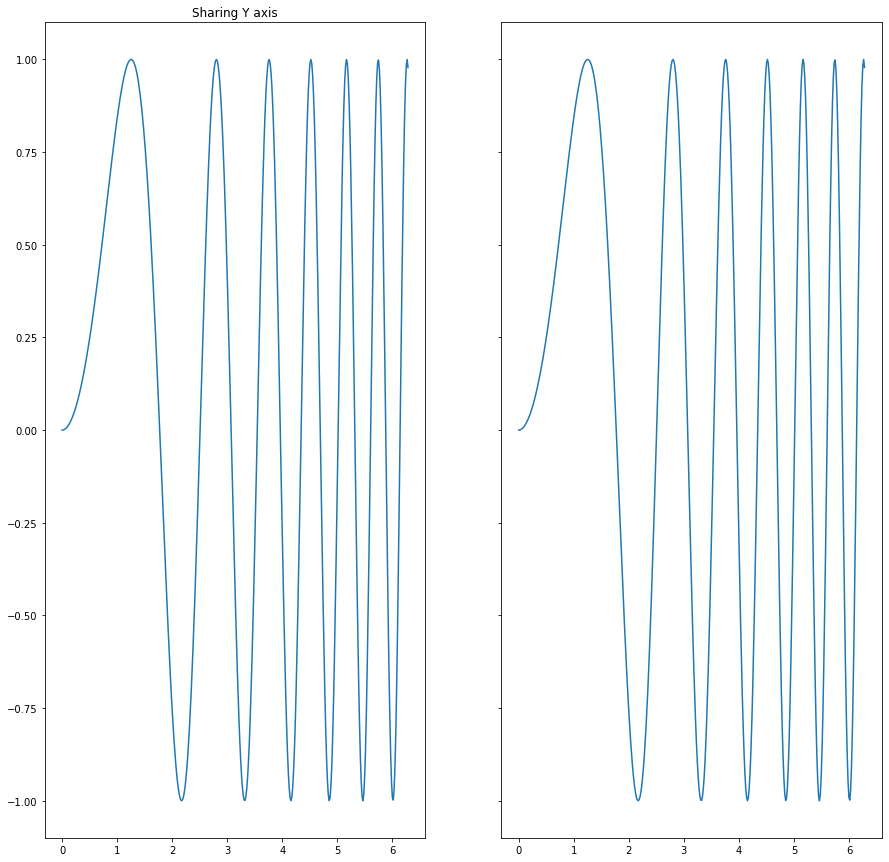

In [44]:
# Create two subplots and unpack the output array immediately
# Possibilité de faire une échelle commune 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.plot(x, y)
plt.show()

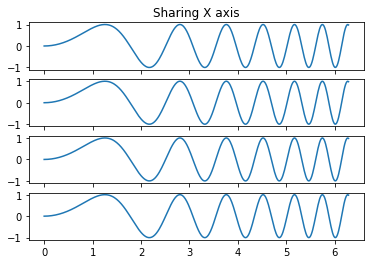

In [83]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
# équivalent à
# f = plt.figure()
# ax1=f.add_subplots(4,1,1)
# ax2=f.add_subplots(4,1,2)
# ax3=f.add_subplots(4,1,3)
# ax4=f.add_subplots(4,1,4)

ax1.plot(x, y)
ax1.set_title('Sharing X axis')
ax2.plot(x, y)
ax3.plot(x, y)
ax4.plot(x, y)
plt.show()

## Superposition de courbes

In [33]:
data["Mois"]=data.DATE.dt.month
data["Annee"]=data.DATE.dt.year
data.head()

,DATE,UNRATE,Mois,Annee
0,1948-01-01,3.4,1,1948
1,1948-02-01,3.8,2,1948
2,1948-03-01,4.0,3,1948
3,1948-04-01,3.9,4,1948
4,1948-05-01,3.5,5,1948


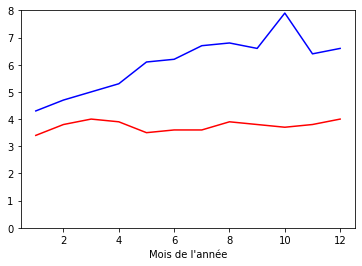

In [42]:
plt.plot("Mois", "UNRATE", data=data.loc[0:11], color="red", label = "1948")
plt.plot("Mois", "UNRATE", data=data.loc[12:23], color="blue", label = "1949")
plt.xlabel("Mois de l'année")
plt.ylim(0,8)
plt.show()

Le problème d'avoir un graphique pour chaque courbe est que cela devient vite illisible si on a beaucoup de courbes à afficher...une solution peut être d'afficher plusieurs courbes sur un même graphique.  
Dans notre cas, si jamais on ne met en abscisses que le mois (au lieu de la date complète) on pourrait afficher les courbes de plusieurs années sur un même graphique.

__À vous !__
>- Récupérer dans l'objet datetime 'DATE' la valeur du mois seulement et le stocker dans une nouvelle variables 'MONTH'
>- Définir la zone d'affichage à 6 pouces de large et 3 pouces de haut.
>- Générer 2 courbes dans un seul graphique en utilisant la colonne 'MONTH' pour l'axe x à la place de la colonne 'DATE':
>>- Une courbe avec les valeurs de 1948 de couleur 'red'
>>- Une courbe avec les valeurs de 1949 de couleur 'blue'
>- Utiliser plt.show() pour afficher les courbes.

## Ajouter plus de courbes

__À vous !__
>- Définir la zone d'affichage du graphique à 10 pouces de large et 6 pouces de haut.
>- Générer avec une boucle les courbes suivantes sur le même graphique:
>>- 1948: courbe en rouge 'red'
>>- 1949: courbe en bleu 'blue'
>>- 1950: courbe en vert 'green'
>>- 1951: courbe en orange 'orange'
>>- 1952: courbe en noir 'black'
>- Utiliser plt.show() pour afficher les courbes.

## Ajouter une légende

__À vous !__
>- Modifier le code précédent pour inclure une légende précisant l'année pour chaque couleur (avec plt.legend et l'option label de plt.plot).
>>- C'est-à-dire que la courbe des données de 1948 qui utilise la couleur rouge 'red' aura comme intitulé dans la légende '1948'
>- Positionner la légende en haut à droite du graphique (voir l'aide positionner les légendes https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)
>- Afficher le graphique.

## Courbe finale

__À vous !__
>- Ajouter au graphique précédent :
>>- le titre 'Evolution du taux de chômage de 1948 à 1952'
>>- l'intitulé pour l'axe x 'Mois (de 1 à 12)'
>>- l'intitulé pour l'axe y 'Taux de chômage (en %)'